In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [323]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [324]:
df.shape

(13320, 9)

In [325]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [326]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [327]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [328]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [329]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [330]:
df.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [331]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

Dropped Unneccessary columns
---

In [332]:
df.drop(['area_type','availability','balcony','society'],axis=1,inplace=True)

In [333]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


Handling Missing Values
---

In [334]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [335]:
df['bath']=df['bath'].fillna(df['bath'].median()).round().astype(int)

In [336]:
df['bath'].unique()

array([ 2,  5,  3,  4,  6,  1,  9,  8,  7, 11, 10, 14, 27, 12, 16, 40, 15,
       13, 18])

In [337]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [338]:
df['size']=df['size'].apply(lambda x:str(x).split()[0])
df['size'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', 'nan', '27',
       '10', '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [339]:
df['size']=df['size'].replace('nan','0')

In [340]:
df['size']=df['size'].astype(int)

In [341]:
df['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9,  0, 27, 10, 19, 16, 43, 14,
       12, 13, 18])

In [342]:
size_median=df['size'].median().round(2).astype(int)

In [343]:
df['size']=df['size'].replace(0,size_median)

In [344]:
df['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [345]:
df.isna().sum()

location      1
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [346]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [347]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [348]:
df['location']=df['location'].fillna(df['location'].mode()[0])

In [349]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

Changiny my coulmn name size to BHK

In [350]:
df['bhk']=df['size']

In [351]:
df.drop(['size'],axis=1,inplace=True)

In [352]:
df.loc[df['bhk']>20]


,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27,230.0,27
4684,Munnekollal,2400,40,660.0,43


Next, We will convert the improper values in total_sqft to proper values

In [353]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

1133 - 1384 =>these values should treated by taking the average

so first we have to find those type of values

In [354]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [355]:
df.loc[~df['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4,186.000,4
56,Devanahalli,3010 - 3410,2,192.000,4
81,Hennur Road,2957 - 3450,2,224.500,4
122,Hebbal,3067 - 8156,4,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2,54.005,2
...,...,...,...,...,...
12990,Talaghattapura,1804 - 2273,3,122.000,3
13059,Harlur,1200 - 1470,2,72.760,2
13240,Devanahalli,1020 - 1130,2,52.570,1
13265,Hoodi,1133 - 1384,2,59.135,2


Function to convert improper values into real numbers

In [356]:
import re


def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    
    num = re.findall(r'\d+\.?\d*', str(x))
    if num:
        return float(num[0])
    try:
        return float(x)
    except:
        return None

In [357]:
convert_sqft_to_num('2100-2850')

2475.0

In [358]:
df['total_sqft']=df['total_sqft'].apply(convert_sqft_to_num)
df.iloc[30,1]

2475.0

In [359]:
np.mean([2100,2850])

2475.0

In [360]:
df.describe()

,total_sqft,bath,price,bhk
count,13320.000000,13320.000000,13320.000000,13320.000000
mean,1555.971707,2.688814,112.565627,2.803979
std,1238.902448,1.338754,148.971674,1.294214
min,1.000000,1.000000,8.000000,1.000000
25%,1100.000000,2.000000,50.000000,2.000000
50%,1275.000000,2.000000,72.000000,3.000000
75%,1679.250000,3.000000,120.000000,3.000000
max,52272.000000,40.000000,3600.000000,43.000000


We replaced by taking average of such imporper values

In [361]:
df.isna().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [362]:
# df

Adding New column called Price Per Sq.ft
---

In [363]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3,95.00,3,6245.890861
4,Kothanur,1200.0,2,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4,231.00,5,6689.834926
13316,Richards Town,3600.0,5,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4,488.00,4,10407.336319


In [364]:
len(df['location'].unique())

1305

Here there are 1305 different locations,which are objects.

if we use get_dummies to convert object to int ,it will creates 1305 new columns

=> which is called DIMENSIONALITY CURSE

In [365]:
df['location']=df['location'].apply(lambda x:x.strip())
df

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3,95.00,3,6245.890861
4,Kothanur,1200.0,2,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4,231.00,5,6689.834926
13316,Richards Town,3600.0,5,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4,488.00,4,10407.336319


In [366]:
location_status=df['location'].value_counts()
location_status

location
Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1294, dtype: int64

In [367]:
location_status_less_than_10=location_status[location_status<=10]
location_status_less_than_10

location
Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1053, dtype: int64

In [368]:
df['location']=df['location'].apply(lambda x:'other' if x in location_status_less_than_10 else x )
df

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3,95.00,3,6245.890861
4,Kothanur,1200.0,2,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4,231.00,5,6689.834926
13316,other,3600.0,5,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4,488.00,4,10407.336319


In [369]:
len(df['location'].unique())

242

Outliers Removal
---

In [370]:
df.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3,95.00,3,6245.890861
4,Kothanur,1200.0,2,51.00,2,4250.000000
5,Whitefield,1170.0,2,38.00,2,3247.863248
6,Old Airport Road,2732.0,4,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4,600.00,4,18181.818182
8,Marathahalli,1310.0,3,63.25,3,4828.244275
9,other,1020.0,6,370.00,6,36274.509804


In [371]:
df = df.loc[(df['total_sqft'] / df['bhk']) >= 300]

df

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3,95.00,3,6245.890861
4,Kothanur,1200.0,2,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4,231.00,5,6689.834926
13316,other,3600.0,5,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4,488.00,4,10407.336319


Outlier removal of Price per sqft
---

In [372]:
df['price_per_sqft'].describe()

count     12538.000000
mean       6303.772400
std        4161.151656
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

<Axes: ylabel='price_per_sqft'>

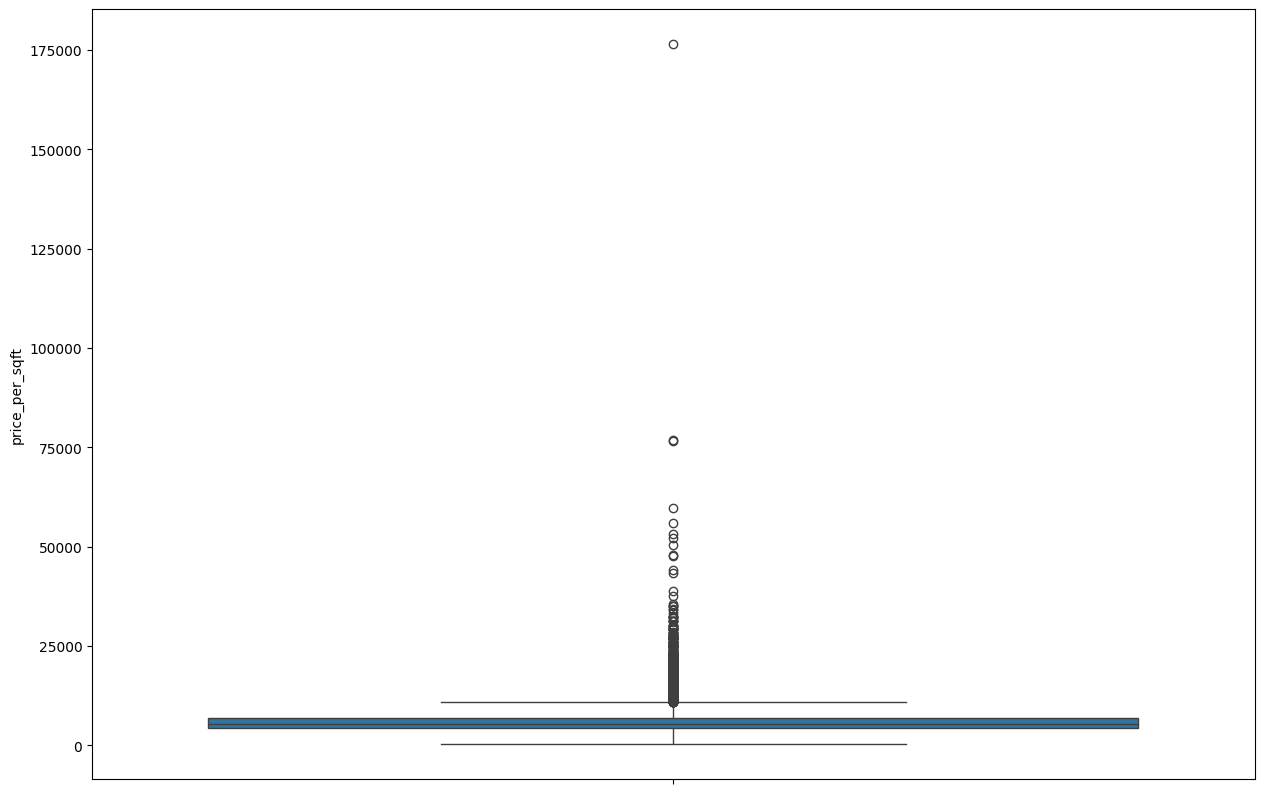

In [373]:
sns.boxplot(y='price_per_sqft',data=df)

In [374]:
q3_price_per_sqft=df['price_per_sqft'].quantile(0.75)
q1_price_per_sqft=df['price_per_sqft'].quantile(0.25)
IQR_price_per_sqft=q3_price_per_sqft-q1_price_per_sqft
IQR_price_per_sqft

2706.1403508771937

In [375]:
upper_bound_price_per_sqft=q3_price_per_sqft+1.5*IQR_price_per_sqft
lower_bound_price_per_sqft=q1_price_per_sqft-1.5*IQR_price_per_sqft


In [376]:
upper_bound_price_per_sqft

10975.877192982458

In [377]:
lower_bound_price_per_sqft

151.3157894736828

In [378]:
# from scipy.stats import norm

# plt.hist(df['price_per_sqft'],bins=20,rwidth=0.8,density=True)
# plt.xlabel('price_per_sqft')
# plt.ylabel('Count')
# rng=np.arange(df['price_per_sqft'].min(),df['price_per_sqft'].max(),0.01)
# plt.plot(rng,norm.pdf(rng,df['price_per_sqft'].mean(),df['price_per_sqft'].std()))

In [379]:
df=df.loc[(df['price_per_sqft']>lower_bound_price_per_sqft)&(df['price_per_sqft']<upper_bound_price_per_sqft)]
df

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3,95.00,3,6245.890861
4,Kothanur,1200.0,2,51.00,2,4250.000000
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3,112.00,3,6530.612245
13315,Whitefield,3453.0,4,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4,488.00,4,10407.336319


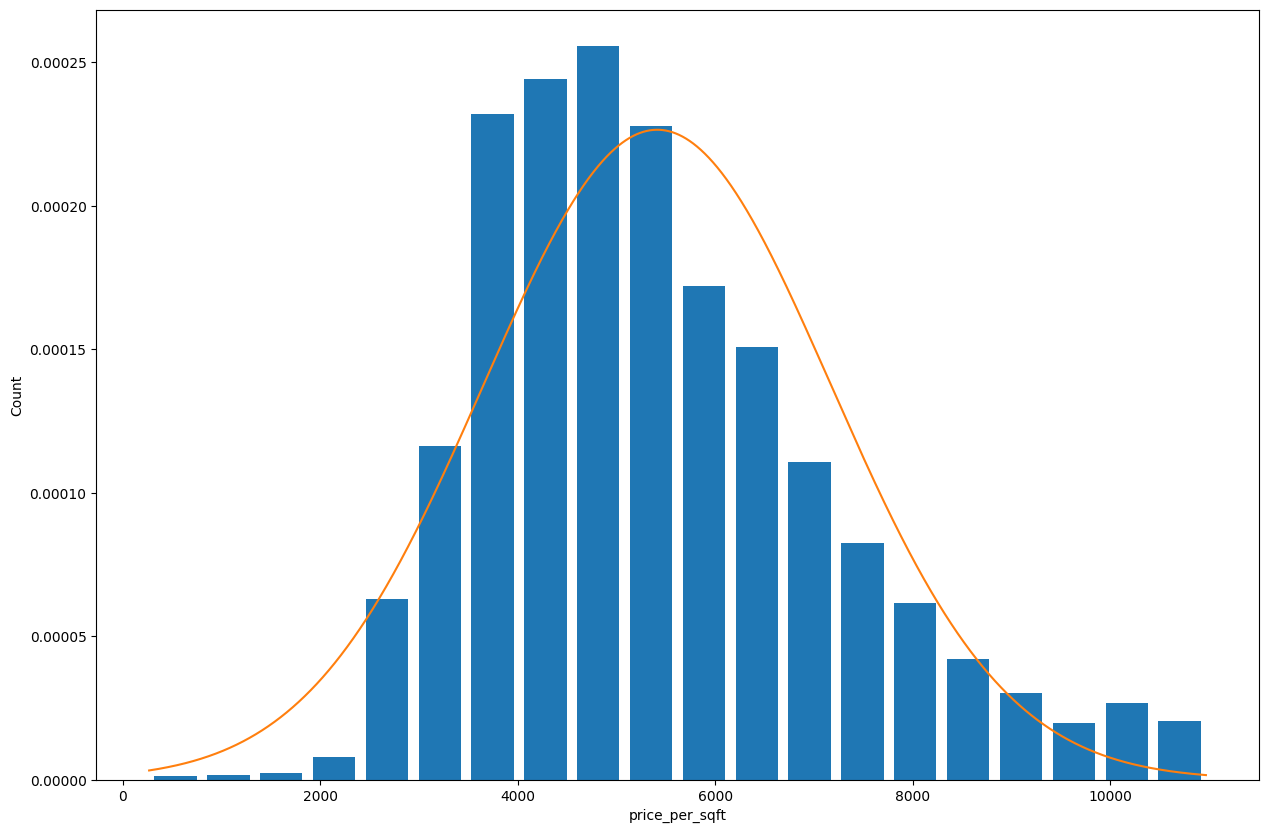

In [380]:
from scipy.stats import norm

plt.hist(df['price_per_sqft'],bins=20,rwidth=0.8,density=True)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')
rng=np.arange(df['price_per_sqft'].min(),df['price_per_sqft'].max(),0.01)
plt.plot(rng,norm.pdf(rng,df['price_per_sqft'].mean(),df['price_per_sqft'].std()))

In [381]:
df.shape

(11531, 6)

Next,There are some plots where total price is greater for 2 bhk than 3 bhk


So we should visualize this and handle it properly

In [382]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    

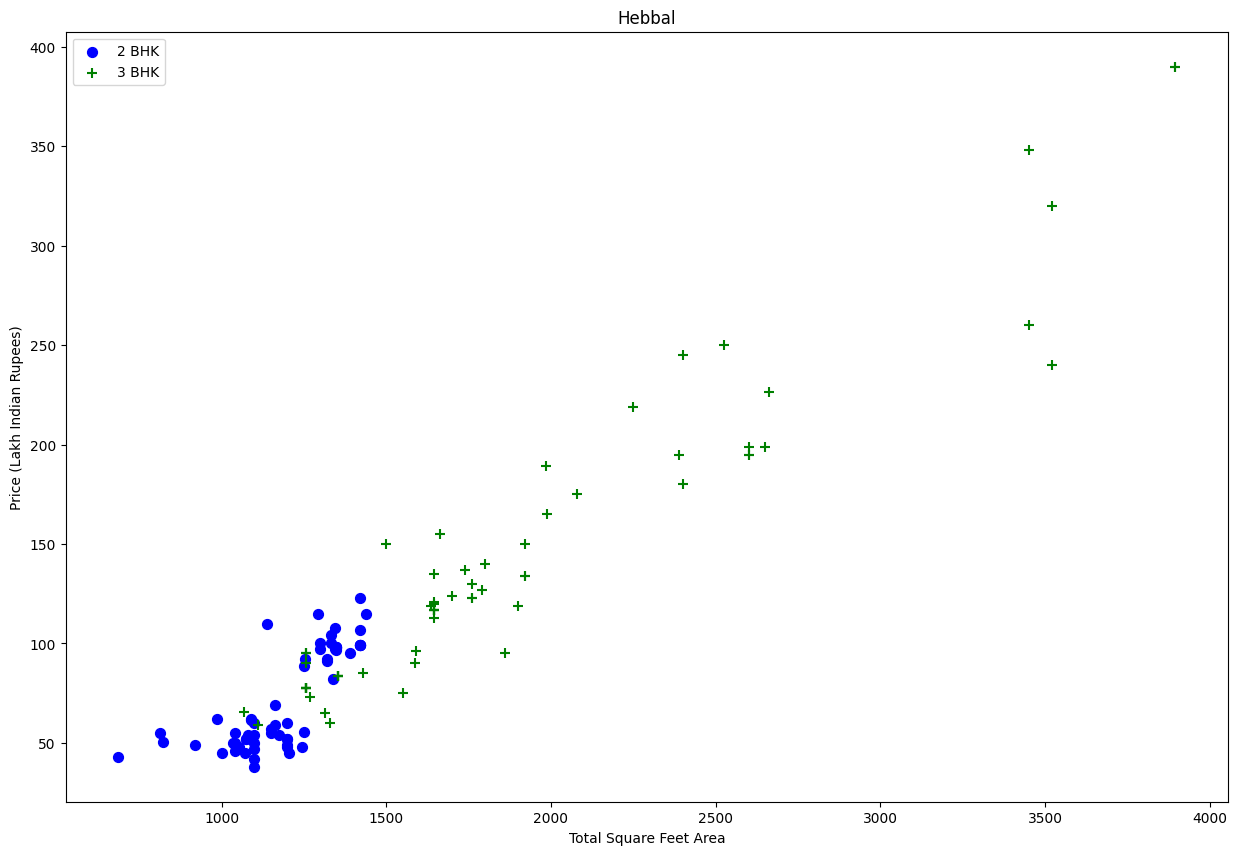

In [383]:
plot_scatter_chart(df,'Hebbal')

In [384]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3,95.00,3,6245.890861
4,Kothanur,1200.0,2,51.00,2,4250.000000


In [385]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df_new = remove_bhk_outliers(df)
df_new.shape

(8288, 6)

Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

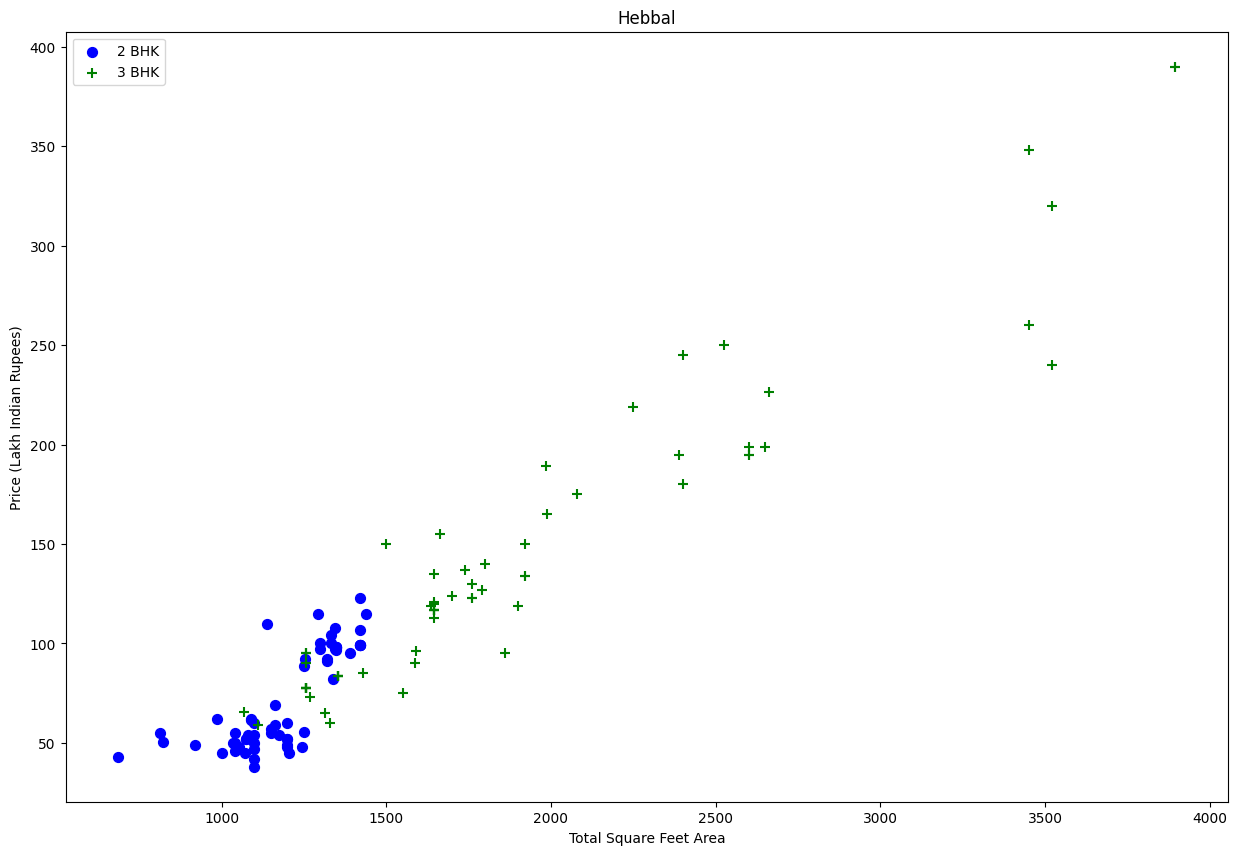

In [386]:
plot_scatter_chart(df,"Hebbal")


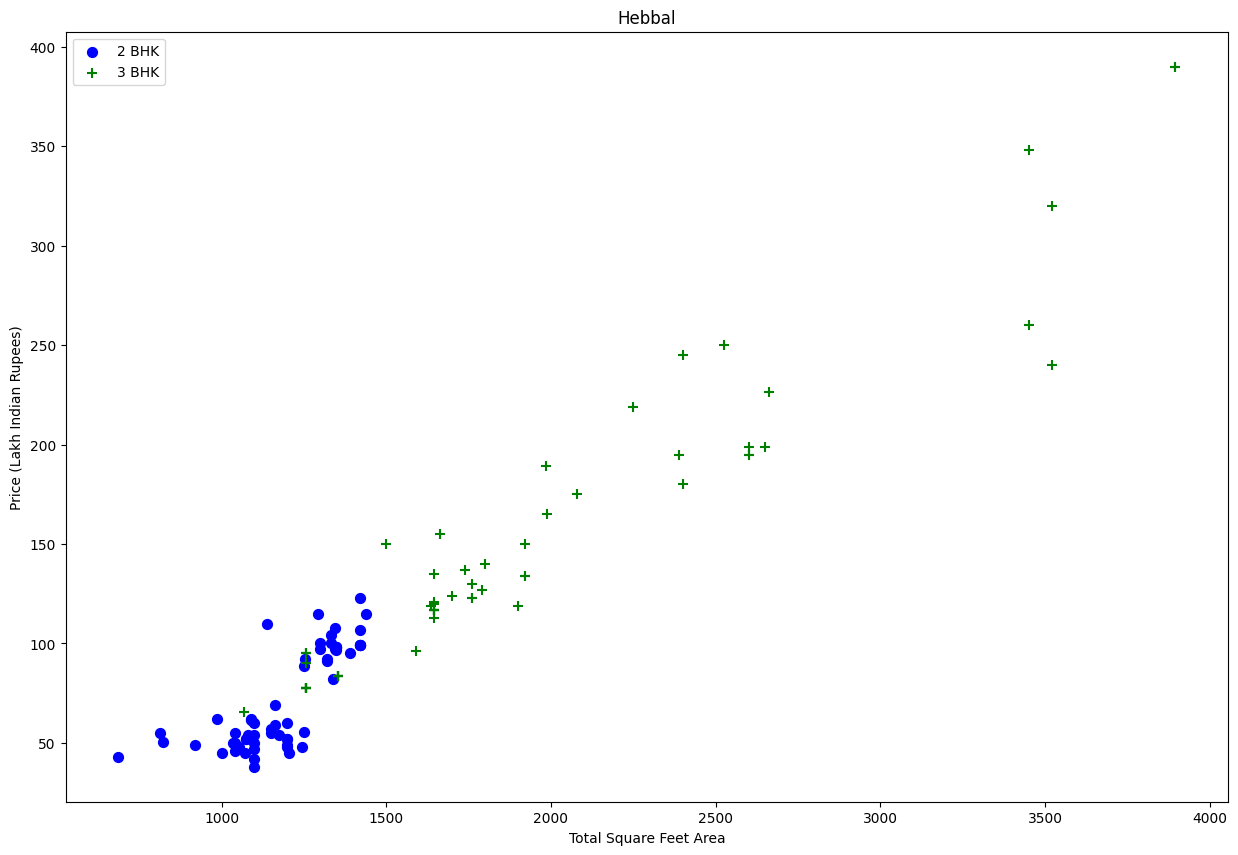

In [387]:
plot_scatter_chart(df_new,"Hebbal")


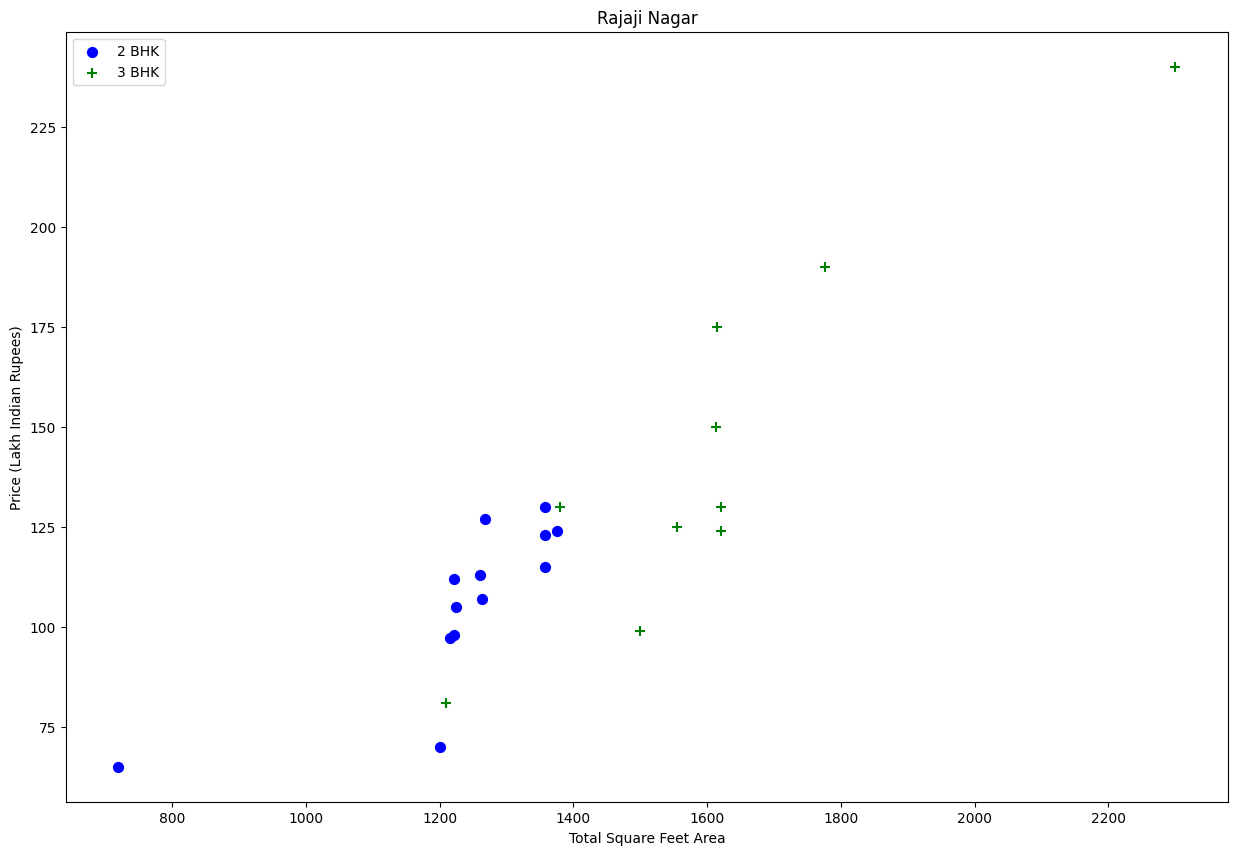

In [388]:
plot_scatter_chart(df,"Rajaji Nagar")


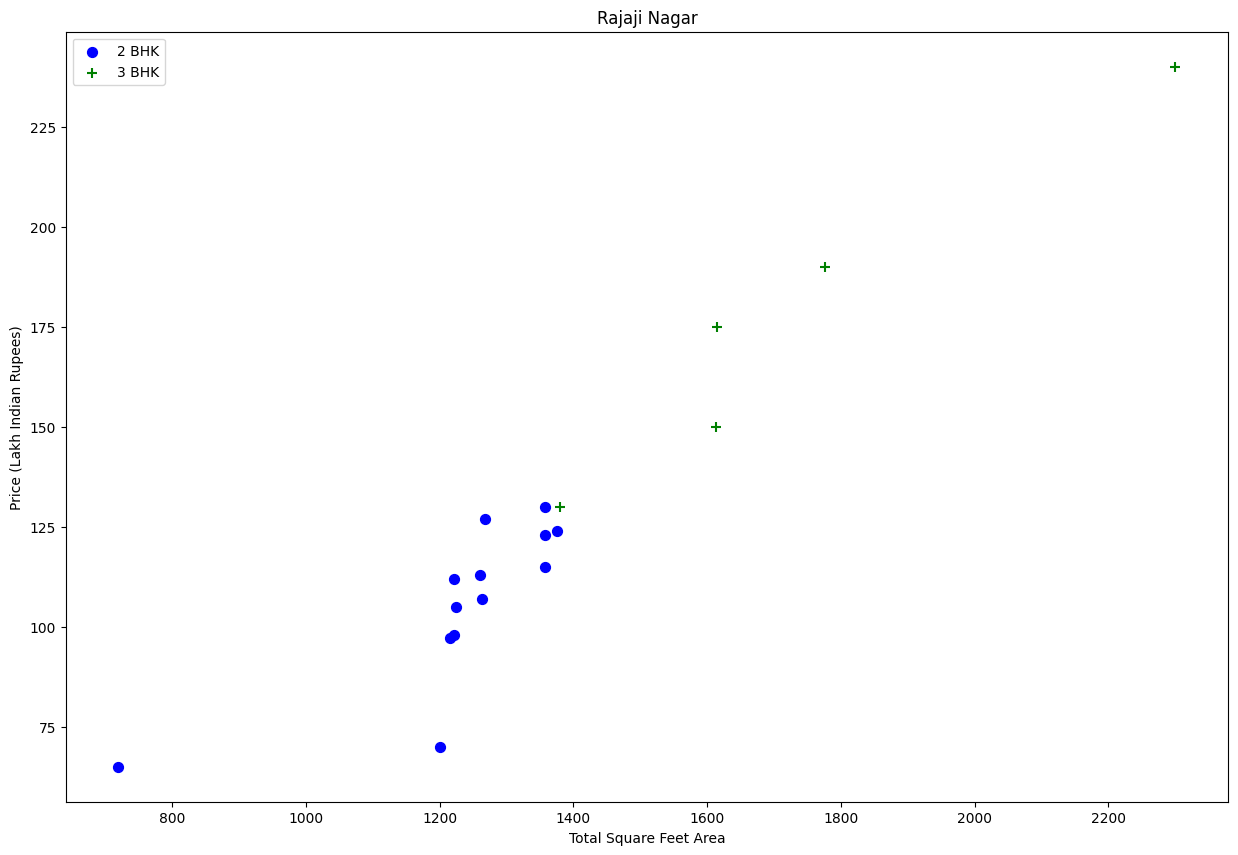

In [389]:
plot_scatter_chart(df_new,"Rajaji Nagar")


In [390]:
df.columns

Index(['location', 'total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

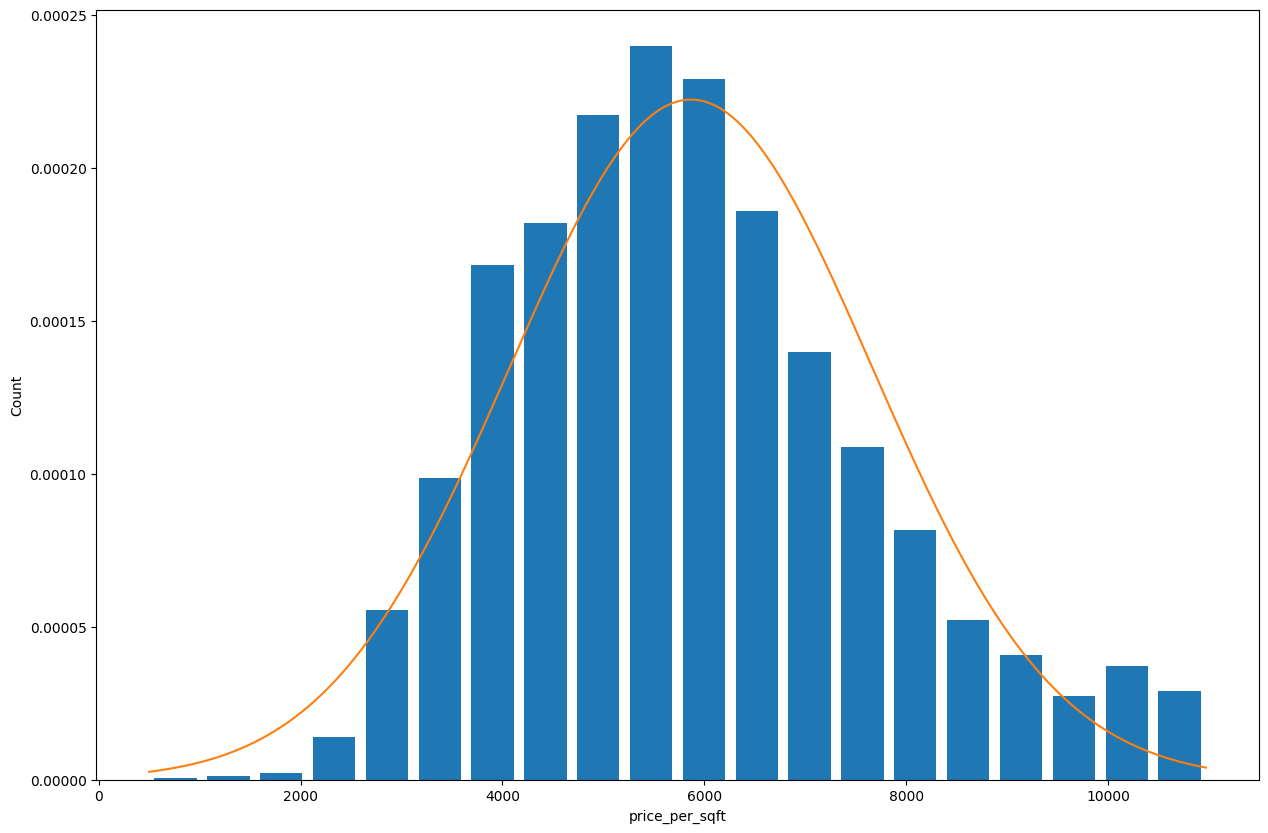

In [391]:
from scipy.stats import norm

plt.hist(df_new['price_per_sqft'],bins=20,rwidth=0.8,density=True)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')
rng=np.arange(df_new['price_per_sqft'].min(),df_new['price_per_sqft'].max(),0.01)
plt.plot(rng,norm.pdf(rng,df_new['price_per_sqft'].mean(),df_new['price_per_sqft'].std()))

In [392]:
df_new['bath'].unique()

array([ 2,  3,  4,  5,  1,  8,  6,  7,  9, 12, 16, 10, 13])

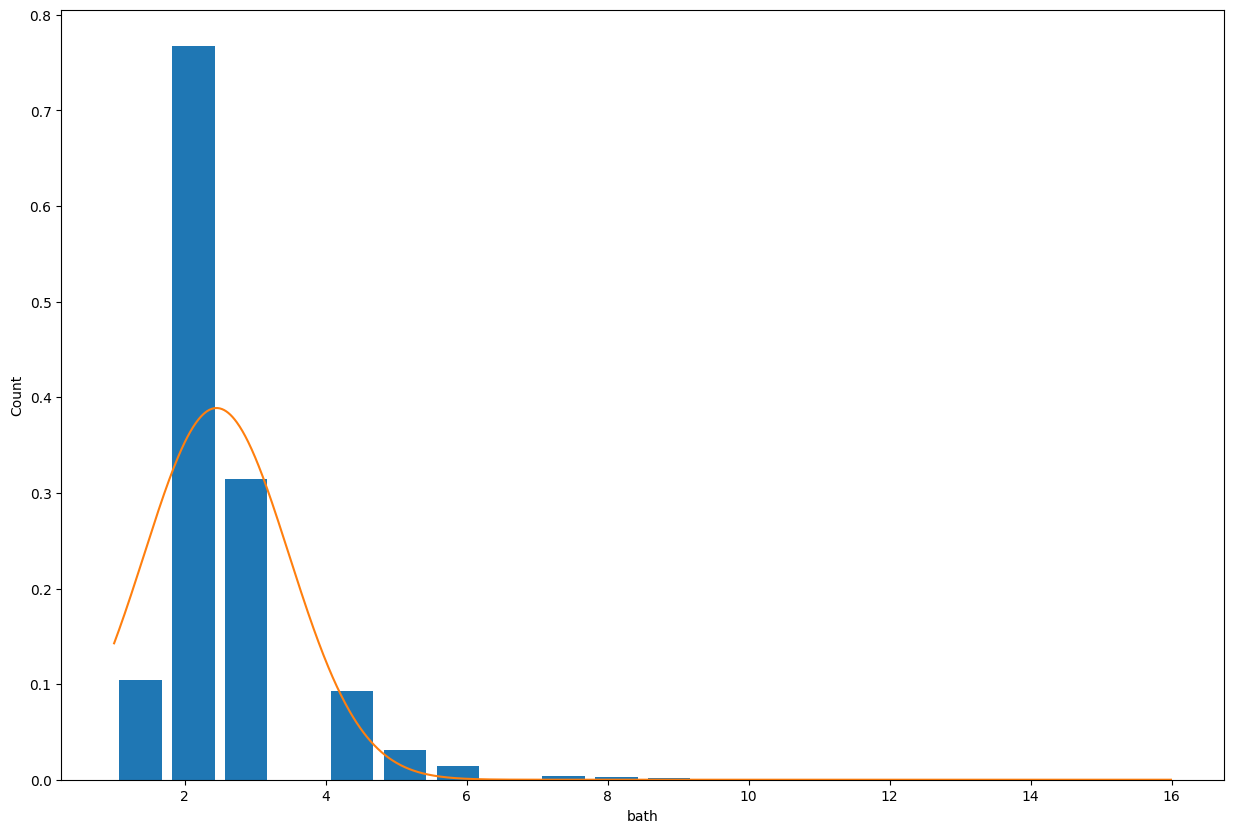

In [393]:
from scipy.stats import norm

plt.hist(df_new['bath'],bins=20,rwidth=0.8,density=True)
plt.xlabel('bath')
plt.ylabel('Count')
rng=np.arange(df_new['bath'].min(),df_new['bath'].max(),0.01)
plt.plot(rng,norm.pdf(rng,df_new['bath'].mean(),df_new['bath'].std()))

In [394]:
df_new




,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,39.07,2,3699.810606
2,Uttarahalli,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3,95.00,3,6245.890861
4,Kothanur,1200.0,2,51.00,2,4250.000000
6,Old Airport Road,2732.0,4,204.00,4,7467.057101
...,...,...,...,...,...,...
13313,Uttarahalli,1345.0,2,57.00,3,4237.918216
13314,Green Glen Layout,1715.0,3,112.00,3,6530.612245
13317,Raja Rajeshwari Nagar,1141.0,2,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4,488.00,4,10407.336319


In [395]:
df_new=df_new.loc[df_new['bath']<(df_new['bhk']+2)]
df_new

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,39.07,2,3699.810606
2,Uttarahalli,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3,95.00,3,6245.890861
4,Kothanur,1200.0,2,51.00,2,4250.000000
6,Old Airport Road,2732.0,4,204.00,4,7467.057101
...,...,...,...,...,...,...
13313,Uttarahalli,1345.0,2,57.00,3,4237.918216
13314,Green Glen Layout,1715.0,3,112.00,3,6530.612245
13317,Raja Rajeshwari Nagar,1141.0,2,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4,488.00,4,10407.336319


In [396]:
df_new.drop(['price_per_sqft'],axis=1,inplace=True)

C:\Users\kevin\AppData\Local\Temp\ipykernel_14680\3193064227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(['price_per_sqft'],axis=1,inplace=True)


In [397]:
df_new

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2,39.07,2
2,Uttarahalli,1440.0,2,62.00,3
3,Lingadheeranahalli,1521.0,3,95.00,3
4,Kothanur,1200.0,2,51.00,2
6,Old Airport Road,2732.0,4,204.00,4
...,...,...,...,...,...
13313,Uttarahalli,1345.0,2,57.00,3
13314,Green Glen Layout,1715.0,3,112.00,3
13317,Raja Rajeshwari Nagar,1141.0,2,60.00,2
13318,Padmanabhanagar,4689.0,4,488.00,4


In [398]:
df_new.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2,39.07,2
2,Uttarahalli,1440.0,2,62.00,3
3,Lingadheeranahalli,1521.0,3,95.00,3
4,Kothanur,1200.0,2,51.00,2
6,Old Airport Road,2732.0,4,204.00,4


In [399]:
df_new.isna().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [400]:
dummies=pd.get_dummies(df_new['location'],dtype=int,drop_first=True)
dummies

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [401]:
df_encoded=pd.concat([df_new,dummies.drop('other',axis='columns')],axis='columns')

In [402]:
df_encoded.drop(['location'],axis=1,inplace=True)

In [403]:
df_encoded.head(4)

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [404]:
df_encoded.shape

(8207, 243)

In [405]:
df_encoded=df_encoded.reset_index(drop=True)
df_encoded

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1440.0,2,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1521.0,3,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2732.0,4,204.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8202,1345.0,2,57.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8203,1715.0,3,112.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8204,1141.0,2,60.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8205,4689.0,4,488.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Splitting our data into x and y

In [406]:
x=df_encoded.drop(['price'],axis=1)
y=df_encoded['price']

In [407]:
x.head()

,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1440.0,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1521.0,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2732.0,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [408]:
y.head()

0     39.07
1     62.00
2     95.00
3     51.00
4    204.00
Name: price, dtype: float64

In [409]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0);

In [410]:
len(x_train)

6565

In [411]:
len(x_test)

1642

In [412]:
len(y_train)

6565

In [413]:
len(y_test)

1642

In [414]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(    
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([112.12124264, 216.3548741 ,  11.64343386, ...,  49.01566906,
        66.01879583,  45.37233146])

In [415]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score

mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAPE :", mape)
print("MAE :", mae)
print("R2 Score :", r2)

MAPE : 0.19169182277343397
MAE : 15.766019914141806
R2 Score : 0.8345404707716867


K-FOLD CROSS VALIDATION(for increasing model accuracy)
---

In [416]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.20,random_state=0)
cross_val_score=cross_val_score(RandomForestRegressor(),x,y,cv=cv)
cross_val_score

array([0.81843713, 0.7398083 , 0.83174923, 0.47080761, 0.83466039])

In [417]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [418]:
model_params = {

    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False]
        }
    },

    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.01, 0.1, 1]
        }
    },

    'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.01, 0.1, 1]
        }
    }, 
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
}


In [419]:
# scores=[]
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import ShuffleSplit

# cv=ShuffleSplit(n_splits=5,test_size=0.20,random_state=0)
# for model_name,model_parameter in model_params.items():
#     clf=clf = RandomizedSearchCV(
#     model_parameter['model'],
#     model_parameter['params'],
#     cv=cv,
#     n_iter=5,   # test only 5 random combinations
#     random_state=42,
#     n_jobs=-1
# )
#     clf.fit(x,y)
#     scores.append({
#         'model':model_name,
#         'best_score':clf.best_score_,
#         'best_params':clf.best_params_
#     }
#     )

In [420]:
# pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [421]:
best_rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=4,
    random_state=1
)

best_rf.fit(x_train,y_train)
y_pred1 = best_rf.predict(x_test)
y_pred1

array([108.20576921, 206.0494947 ,  12.03136094, ...,  45.5275889 ,
        65.44242639,  45.96311351])

In [422]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

print("MAPE:", mean_absolute_percentage_error(y_test, y_pred1))
print("MAE:", mean_absolute_error(y_test, y_pred1))
print("R2 Score:", r2_score(y_test, y_pred1))

MAPE: 0.1955462838942016
MAE: 16.192794294814558
R2 Score: 0.8324704795202036


In [423]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=242)

In [425]:
def prediction(location,total_sqft,bath,bhk):
    x=df_encoded.drop(['price'],axis=1)
    loc_index=np.where(x.columns==location)[0][0] # finding the index of given location

    x=np.zeros(len(x.columns))
    x[0]=total_sqft
    x[1]=bath
    x[2]=bhk

    if loc_index>=0:
        x[loc_index]=1
    
    return best_rf.predict([x])[0]



In [427]:
prediction('1st Phase JP Nagar',1000,2,2)

C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


50.390908247508875

In [428]:
prediction('1st Phase JP Nagar',1000,2,3)


C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


55.32035422325685

In [429]:
prediction('Indira Nagar',1000,2,2)

C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


50.390908247508875

In [ ]:
prediction('Indira Nagar',2400,3,3)

C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


148.44138695419073

In [434]:
prediction('2nd Stage Nagarbhavi',1500,4,6)


C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


115.12222574848235

In [435]:
import pickle
with open('banglore_home_price_model.pickle','wb') as f:
    pickle.dump(best_rf,f)

In [436]:
import json
columns={
    'data_columns':[col.lower() for col in x.columns]

}

with open('columns.json','w') as f:
    f.write(json.dumps(columns))

In [438]:
len(x.columns)

242